# Coding gradient descent algorithm to minimize cost function from a basic ML regression model II

## VERSION II : utilisation de matrices

A basic situation :

data : X=(1,2,3,4,5,6), Y=(1, 2, 2.5, 3.5, 4.3, 5.2) 

model : f(x) = ax + b

cost function : from euclidian distance

minimizing cost function with gradient descent algorithm


Remarque : petite modification : la descente du gradiant est définie avec un hyperparamètre alpha qui indique le déplacement a effectuer dans le sens de la pente, par la valeur donnée par alpha * pente. Or, à proximité du minimum, la pente tend vers 0, le déplacement devient minime. Alpha ne peut cependant pas être défini 'trop grand' au début, sinon,
on risque de 'tourner' autour du minimum.

Ici, on a ajouté ici un paramétrage de alpha : si on se place au-delà du minimum (détecté par le changement de signe de la pente), alors on réduit alpha (de 90% ici). alpha peut alors être initialisé avec une valeur 'grande'.


**Evolutions :**

La question est maintenant de savoir comment s'assurer que l'on va suffisamment vite vers le minima. 
Dans cet exemple simple, on peut 'voir' la progression de la fonction de coût vers le minima :

- Ajout du graphique animé du parcours vers le minimum dans 'vallée' de la fonction de coût.

- Graphe des valeurs de la fonction de coût dans le temps


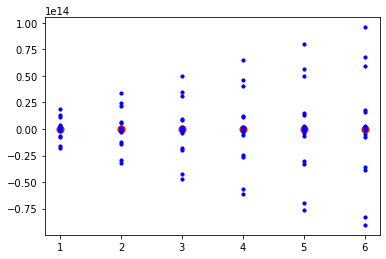


résultat final :
a0, b0, deltaj, cpt :
0.9998297607738874 0.0007296739633198199 -9.977007798333075e-10 711


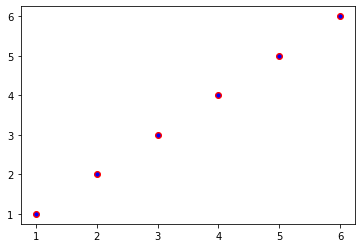

In [1]:
#imports
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt


#Functions

#Calcul de la valeur de la fonction de coût en a, b = j(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à a au point a,b = dja(a,b)

#Calcul de la dérivée de la fonction de coût par rapport à b au point a,b = djb(a,b)



# -------------------------------------------------------------------------------------------------------
# data
# -------------------------------------------------------------------------------------------------------
#X: une seule caractéristique, m observations
data=pd.DataFrame({"Feature":[1  , 2  , 3  , 4  , 5  , 6  ]})
#Y=pd.Series(              [1  , 2  , 2.5, 3.5, 4.3, 5.2] )
Y=pd.Series(              [1  , 2  , 3, 4, 5, 6] )
m=X.shape[0]

# -------------------------------------------------------------------------------------------------------
# Réécriture avec numpy
# -------------------------------------------------------------------------------------------------------
X=np.array([1,1],
           [2,1],
           [3,1],
           [4,1],
           [5,1],
           [6,1],
          )
Y=np.array([1. ],
           [2. ],
           [2.5],
           [3.5],
           [4.3],
           [5.2]
          )


# -------------------------------------------------------------------------------------------------------------
# definition du modèle : un modèle linéaire affine de typ f(X)=XTheta - calcul de Y en X pour Theta donnés 
# NB : on généralise ici le cas à 1 feature et 2 paramètres (a,b) [cf. f(x)=ax+b] (a pour x et b pour le biais)
#      au cas avec n features (n+1 paramètres - n+le biais): 
# -------------------------------------------------------------------------------------------------------------
def f(X,Theta):
    """
    entrée : X matrice (m, n+1) avec m nombre d'observations, n nombre de features
             Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    sortie : la matrice produite X.Theta (m,1) = (a1x1i + a2x2i + ... + anxni + b)i=1...m
    """
    return (X.dot(Theta))

# -------------------------------------------------------------------------------------------------------
# choix de la fonction de coût j (norme euclidienne) - calcul de la fonction j en a,b 
# -------------------------------------------------------------------------------------------------------
def cost_function(Theta):
    """
    Définie par la norme euclidienne
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la valeur de la fonction de coût pour les paramètres Theta (en X, Y)
    """
    #Calcul de la somme des carrés
    result  = 1/(2*m) * np.sum( (X.dot(Theta) - Y)**2 )
    
    #Autre écriture :
    result2 = 1/(2*m) * (X.dot(Theta) - Y).T.dot(X.dot(Theta) - Y)   
    
    return result 
    

    
# -------------------------------------------------------------------------------------------------------
# Détermination du gradiant de j selon a et b :
# -------------------------------------------------------------------------------------------------------
def gradj(Theta):
    """
    Calcul du gradiant (matrice n+1, 1)
    En entrée : Theta matrice (n+1,1) les n+1 paramètres pour chacune des n features + le bias (a1,a2,...,an, b)
    En sortie : la matrice des dérivées de la fonction de coût pour chaque paramètre en Theta (pour X, Y donnés)
    """    
    gradJTheta = 1/m *  X.T.dot(f(X,Theta) - Y)
 
    return gradJTheta

# -------------------------------------------------------------------------------------------------------
# algorithme de descente du gradiant    
# -------------------------------------------------------------------------------------------------------

#Initialisations

#le coefficient de descente
alpha=0.1
#version+ (ajout du paramétrage de alpha - un pour chaque direction)
alphaa=1
alphab=1
sign_grada_prec = 1 #pour garder en mémoire le signe de la pente précédente
sign_gradb_prec = 1

#les paramètres a0 et b0 de départ
a0=1 #une pente de 1
b0=Y.mean() #la moyenne des outputs Y
deltaj=1 #pour rentrer dans la boucle

#la valeur de delta (variation de j) que l'on souhaite atteindre
deltaj_cible = 0.000000001

#compteur d'itérations et max cible
cpt = 0
cpt_max = 1000

#graph
a1=a0
b1=b0
plt.scatter(X,Y, c="red", s=50)
plt.scatter(X,f(X,a1,b1), c="blue", s=10)
#plt.show()
    
#Boucle
#on va 'descendre' jusqu'à ce que la variation de J soit 'suffisamment' petite où que l'on ait bouclé un certain nb de x
while abs(deltaj) > deltaj_cible or cpt > cpt_max:
    cpt+=1
    #Calcul du gradian en a0, b0
    grad = gradj(a0,b0)
    
    #Calcul de a1 et b1 (le nouveau point après déplacement dans le sens de la pente descendante)
    #a1=a0-alpha*grad[0]
    #b1=b0-alpha*grad[1]

    #variante : ajout d'un coefficient dégressif selon changement de signe du gradian
    if np.sign(grad[0])!=sign_grada_prec:
        alphaa=alphaa*0.9 #réduction de alphaa de 90%
    if np.sign(grad[1])!=sign_gradb_prec:
        alphab=alphab*0.9 #réduction de alphab de 90%
    a1=a0-alphaa*grad[0]
    b1=b0-alphab*grad[1]
    sign_grada_prec = np.sign(grad[0])
    sign_gradb_prec = np.sign(grad[1])
    
    #Calcul de la variation de valeur de la fonction de coût entre a0, b0 et a1, b1
    deltaj = cost_function(a1,b1) - cost_function(a0,b0)
    #print("cpt,a1,b1 =", cpt, a1, b1)
    #print("deltaj    =", deltaj)
    #print("cost      =", cost_function(a1,b1))
    #graph
    #plt.scatter(X,Y, c="red")
    plt.scatter(X,f(X,a1,b1), c="blue", s=10)
    #plt.show()
    
    #préparation de la boucle suivante
    a0=a1
    b0=b1
    
plt.show()

print("\nrésultat final :")
print("a0, b0, deltaj, cpt :")
print(a0, b0, deltaj, cpt)
plt.scatter(X,Y, c="red")
plt.scatter(X,f(X,a1,b1), c="blue", s=10)
plt.show()
    

#